# Task-04
# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as lb
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

## Importing Datasets

In [48]:
twitts_train= pd.read_csv("CSV/task4_csv/twitter_training.csv")
twitts_valid= pd.read_csv("CSV/task4_csv/twitter_validation.csv")

## Analyzing the datasets

In [50]:
column_name = ["tweet_id","entity","sentiment","tweet_content"]
twitts_train.columns= column_name
twitts_valid.columns = column_name
#  Merging both datasets
data= pd.concat([twitts_train,twitts_valid],ignore_index= False)
data.head()
data.shape

(75680, 4)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       75680 non-null  int64 
 1   entity         75680 non-null  object
 2   sentiment      75680 non-null  object
 3   tweet_content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [52]:
data.isna().sum()

tweet_id           0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [53]:
data.columns.tolist()

['tweet_id', 'entity', 'sentiment', 'tweet_content']

In [54]:
data.duplicated().sum()

3216

## Dropping Null Values and Duplicates as well as unnecessary columns

In [56]:
data.dropna(inplace= True)
data.drop_duplicates(inplace=True)
print(data.isnull().sum())
print(data.duplicated().sum())

tweet_id         0
entity           0
sentiment        0
tweet_content    0
dtype: int64
0


In [57]:
data.drop(columns=['tweet_id','tweet_content'],inplace = True)

In [58]:
data.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


## Entity Mention Distribution

## The below chart shows how frequently each brand or topic appears in the dataset.

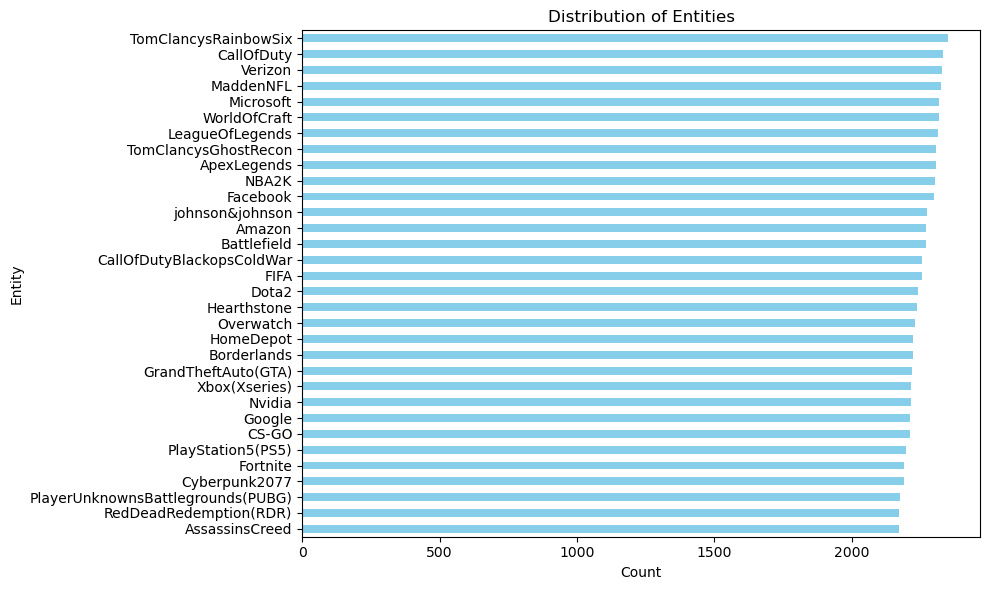

In [60]:
entity_content = data['entity'].value_counts()
plt.figure(figsize=(10, 6))
entity_content.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Entities')
plt.gca().invert_yaxis()  # Most common entity on top
plt.tight_layout()
plt.show()

###  Entity Distribution (%)

### The below chart shows the percentage of mentions for each entity (e.g., brands, games, or platforms) from social media data.

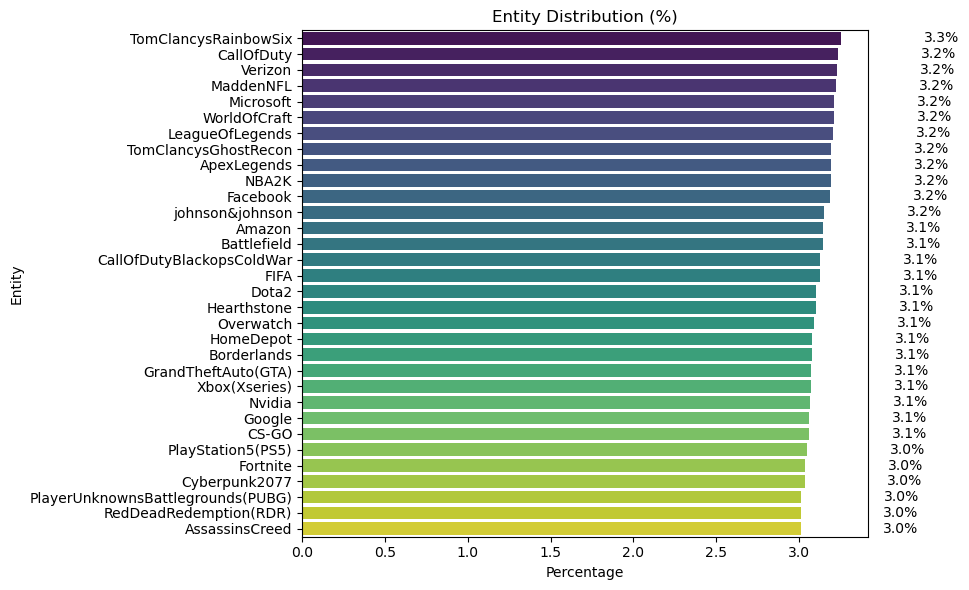

In [62]:
entity_counts = data['entity'].value_counts(normalize=True) * 100
entity_df = entity_counts.reset_index()
entity_df.columns = ['Entity', 'Percentage']

plt.figure(figsize=(10, 6))
sns.barplot(data=entity_df, y='Entity', x='Percentage', palette='viridis')

for index, value in enumerate(entity_df['Percentage']):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')

plt.title('Entity Distribution (%)')
plt.xlabel('Percentage')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

### Overall Sentiment Analysis

### The below chart represents the **distribution of sentiment** across all collected social media posts.

### - 🟥 **Negative**: 30.2%
### - 🟧 **Positive**: 27.5%
### - 🟦 **Neutral**: 24.8%
### - 🟪 **Irrelevant**: 17.5%

### The data suggests a slightly higher share of negative opinions, followed by positive and neutral. This insight helps identify how the general public feels about the discussed entities.

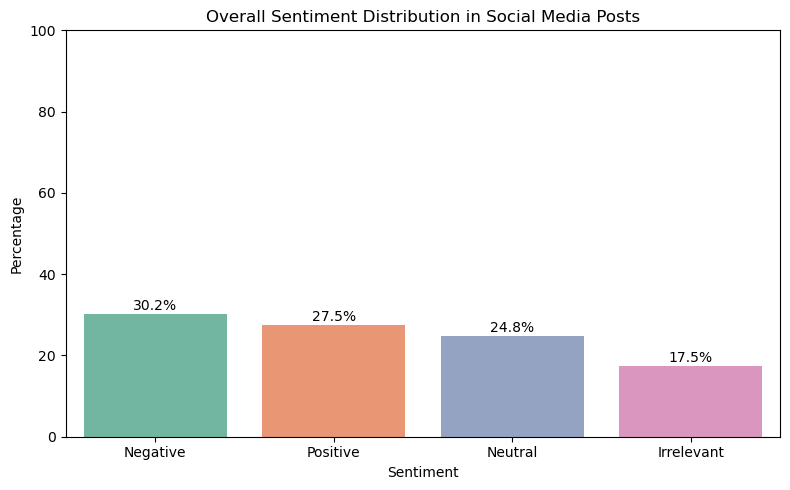

In [64]:
sentiment_counts = data['sentiment'].value_counts(normalize=True) * 100
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['Sentiment', 'Percentage']

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_df, x='Sentiment', y='Percentage', palette='Set2')

# Annotate bars with %
for i, v in enumerate(sentiment_df['Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.title("Overall Sentiment Distribution in Social Media Posts")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

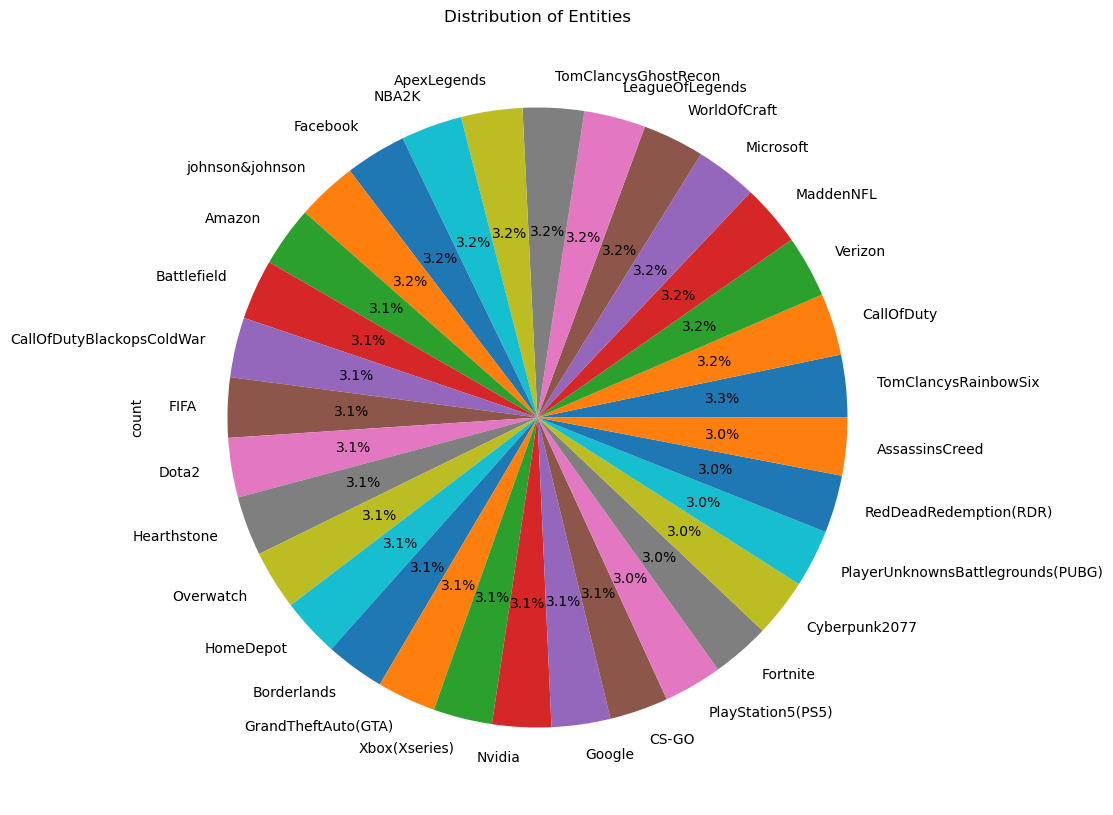

In [66]:
entity_content=data['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()

### Entity Distribution – Pie Chart

### The pie chart above illustrates the **relative mention distribution** of various entities across the dataset. This format gives a quick visual understanding of the balance in entity popularity.
